In [56]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [57]:
veggie = pd.read_csv('Desktop/git/final_veggie.csv')
veggie.head()

,Unnamed: 0,Unnamed: 0.1,name,categories,rating,latitude,longitude,address,city,state,zip_code
0,0,0,The Wild Cow,"['vegetarian', 'newamerican', 'vegan']",4.5,36.173823,-86.750055,1100 Fatherland St,Nashville,TN,37206
1,1,1,Sunflower Cafe,"['cafes', 'vegetarian', 'vegan']",4.5,36.113197,-86.767731,2834 Azalea Pl,Nashville,TN,37204
2,2,2,Graze Nashville,"['vegan', 'newamerican']",4.5,36.182320,-86.735500,1888 Eastland Ave,Nashville,TN,37206
3,3,3,Avo,['vegan'],4.5,36.152674,-86.820084,3 City Ave,Nashville,TN,37209
4,4,4,Vege-licious,"['vegan', 'vegetarian', 'breakfast_brunch']",4.5,36.160499,-86.800702,513B Fisk St,Nashville,TN,37203


In [58]:
veggie.drop('Unnamed: 0', axis=1, inplace=True)

In [59]:
veggie.drop('Unnamed: 0.1', axis=1, inplace=True)

In [60]:
veggie.tail()

,name,categories,rating,latitude,longitude,address,city,state,zip_code
11735,Spice Connexion,"['indpak', 'vegan', 'buffets']",4.5,39.453121,-77.987884,796 Foxcroft Ave,Martinsburg,WV,25401
11736,Earth Based Cafe,['vegan'],5.0,39.455503,-77.972349,329 Winchester Ave,Martinsburg,WV,25401
11737,Paramount Ballroom,"['vegetarian', 'lounges', 'cocktailbars']",4.5,41.133169,-104.815396,1609 Capitol Ave,Cheyenne,WY,82001
11738,Hi Sushi,"['japanese', 'sushi', 'vegetarian']",3.0,41.138199,-104.785695,2543 E Lincolnway,Cheyenne,WY,82001
11739,Sweet Melissa's,"['vegetarian', 'bars']",4.5,41.311570,-105.595935,213 S 1st St,Laramie,WY,82070


In [61]:
veggie['categories'] = veggie['categories'].str.strip('[]')

In [62]:
veggie.head(1)

,name,categories,rating,latitude,longitude,address,city,state,zip_code
0,The Wild Cow,"'vegetarian', 'newamerican', 'vegan'",4.5,36.173823,-86.750055,1100 Fatherland St,Nashville,TN,37206


In [63]:
veggie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740 entries, 0 to 11739
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11740 non-null  object 
 1   categories  11740 non-null  object 
 2   rating      11740 non-null  float64
 3   latitude    11740 non-null  float64
 4   longitude   11740 non-null  float64
 5   address     11462 non-null  object 
 6   city        11740 non-null  object 
 7   state       11740 non-null  object 
 8   zip_code    11737 non-null  object 
dtypes: float64(3), object(6)
memory usage: 825.6+ KB


In [64]:
#veggie['categories'] = veggie['categories'].str.strip('''''')

In [65]:
veggie['geometry'] = veggie.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)
veggie.head(3)

,name,categories,rating,latitude,longitude,address,city,state,zip_code,geometry
0,The Wild Cow,"'vegetarian', 'newamerican', 'vegan'",4.5,36.173823,-86.750055,1100 Fatherland St,Nashville,TN,37206,POINT (-86.750055 36.173823)
1,Sunflower Cafe,"'cafes', 'vegetarian', 'vegan'",4.5,36.113197,-86.767731,2834 Azalea Pl,Nashville,TN,37204,POINT (-86.76773071289058 36.11319732666021)
2,Graze Nashville,"'vegan', 'newamerican'",4.5,36.182320,-86.735500,1888 Eastland Ave,Nashville,TN,37206,POINT (-86.7355 36.18232)


In [66]:
type(veggie)

pandas.core.frame.DataFrame

In [69]:
veggie_geo = gpd.GeoDataFrame(veggie,
                             crs = 'EPSG:4326',
                             geometry = veggie['geometry'])

In [70]:
type(veggie_geo)

geopandas.geodataframe.GeoDataFrame

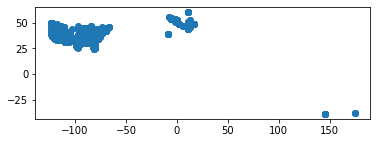

In [71]:
veggie_geo.plot();

In [75]:
city_counts = veggie_geo.groupby(['city','state']).size()
city_counts.sort_values(ascending = False)

city          state
Los Angeles   CA       596
Philadelphia  PA       219
San Diego     CA       179
Portland      OR       161
Seattle       WA       156
                      ... 
Garwood       NJ         1
Pooler        GA         1
Gig Harbor    WA         1
Glassboro     NJ         1
Abbotsford    VIC        1
Length: 1267, dtype: int64

In [25]:
#veggie_map = folium.Map(location = [39.8283, -98.5795])

#folium.GeoJson(veggie).add_to(veggie_map)

#for row_index, row_values in veggie.iterrows():
    #loc = [row_values['latitude'], row_values['longitude']]
    #pop = str(row_values['name'])
    #icon = folium.Icon(color='green',icon='pagelines',prefix='fa')
    
    #marker = folium.Marker(
        #location = loc,
        #popup = pop, icon = icon)
    
    #marker.add_to(veggie_map)
    
#veggie_map